In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('voting_candidate.csv', encoding = 'latin-1')
df.head()

Province        Municipality            Party/Indep  OrderNo/Ward  \
0  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS             1   
1  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200005   
2  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200006   
3  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200011   
4  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200020   

           Fullname   Surname Gender  Age  
0  MSONDEZI PATRICK  MAXATANA      M   51  
1  MSONDEZI PATRICK  MAXATANA      M   51  
2  MSONDEZI PATRICK  MAXATANA      M   51  
3  MSONDEZI PATRICK  MAXATANA      M   51  
4  MSONDEZI PATRICK  MAXATANA      M   51

## DATA CLEANING

In [3]:
#Determining the data types
df.dtypes

Province        object
Municipality    object
Party/Indep     object
OrderNo/Ward     int64
Fullname        object
Surname         object
Gender          object
Age              int64
dtype: object

The data types are determined above. The data is as required. There is therefore no need to convert data types. The columns 'Fullname' and 'Surname' are combined so candidates who stand at different wards can be identified.

In [4]:
#Combining 'Fullname' and 'Surname' columns into a new column 'Name'
df['Name'] = df['Fullname'] + ' ' + df['Surname']
df.head()

Province        Municipality            Party/Indep  OrderNo/Ward  \
0  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS             1   
1  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200005   
2  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200006   
3  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200011   
4  Eastern Cape  BUF - Buffalo City  ABANTU BATHO CONGRESS      29200020   

           Fullname   Surname Gender  Age                       Name  
0  MSONDEZI PATRICK  MAXATANA      M   51  MSONDEZI PATRICK MAXATANA  
1  MSONDEZI PATRICK  MAXATANA      M   51  MSONDEZI PATRICK MAXATANA  
2  MSONDEZI PATRICK  MAXATANA      M   51  MSONDEZI PATRICK MAXATANA  
3  MSONDEZI PATRICK  MAXATANA      M   51  MSONDEZI PATRICK MAXATANA  
4  MSONDEZI PATRICK  MAXATANA      M   51  MSONDEZI PATRICK MAXATANA

## MISSING DATA

In [5]:
#Determining the number of missing data per column
df.isnull().sum()

Province        0
Municipality    0
Party/Indep     0
OrderNo/Ward    0
Fullname        0
Surname         0
Gender          0
Age             0
Name            0
dtype: int64

There are no missing data from the data set

## DATA ANALYSIS

This data set consists of electoral candidates in the South African municipal elections. In this project,
* we assess representation in terms of gender,that is the number of female versus male candidates,
* representation in terms of age

* and representation in terms of number of candidates per political party

In [6]:
#Determining the number of rows and columns of the data frame
df.shape

(95427, 9)

Province  Municipality  Party/Indep  OrderNo/Ward  Fullname  Surname  \
0   Eastern Cape         11237        11237         11237     11237    11237   
1     Free State          5870         5870          5870      5870     5870   
2        Gauteng         17085        17085         17085     17085    17085   
3  KwaZulu-Natal         21456        21456         21456     21456    21456   
4        Limpopo         11617        11617         11617     11617    11617   
5     Mpumalanga          6075         6075          6075      6075     6075   
6     North West          6698         6698          6698      6698     6698   
7  Northern Cape          2956         2956          2956      2956     2956   
8   Western Cape         12433        12433         12433     12433    12433   

   Gender    Age   Name  
0   11237  11237  11237  
1    5870   5870   5870  
2   17085  17085  17085  
3   21456  21456  21456  
4   11617  11617  11617  
5    6075   6075   6075  
6    6698   6698   6698  
7    2956   2956   2956  
8   12433  12433  12433

Text(0.5, 0, 'Province')

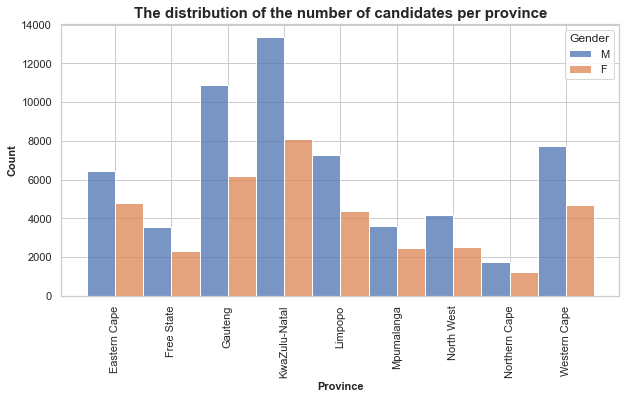

In [38]:
grouped= df.groupby(['Province']).count()
grouped.reset_index(inplace = True)
display(grouped)

#Plotting a bar graph for the number of candidancies per province
plt.figure(figsize=(10,5))
sns.set_theme(style= 'whitegrid')
sns.histplot(x= 'Province', data = df, hue='Gender',multiple = 'dodge')

plt.title('The distribution of the number of candidates per province', size=15, fontweight='bold')
plt.xticks(rotation=90, size = 11 )
plt.ylabel('Count', size = 11, fontweight='bold')
plt.xlabel('Province', size = 11, fontweight='bold')


The barchart above has the blue bars representing the number of male candidates while the red bars represent the number of female candidates per province. The most candidates are in the KZN province, followed by Gauteng and then the Western Cape. There is generally a higher count of males compared to females in all provinces. The 3 provinces with significantly higher male representation are Gauteng, KwaZulu Natal and the Western Cape. The Northen Cape has the smallest difference between the genders

Gender  Province  Municipality  Party/Indep  OrderNo/Ward  Fullname  \
0      F     36617         36617        36617         36617     36617   
1      M     58810         58810        58810         58810     58810   

   Surname    Age   Name  
0    36617  36617  36617  
1    58810  58810  58810

Text(0.5, 0, 'Gender')

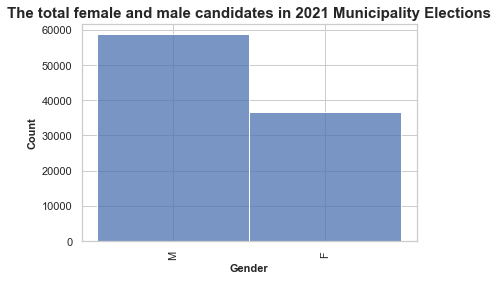

In [8]:
grouped_gender= df.groupby(['Gender']).count()
grouped_gender.reset_index(inplace = True)
display(grouped_gender)
sns.histplot(x= 'Gender', data = df)

plt.title('The total female and male candidates in 2021 Municipality Elections', size=15, fontweight='bold')
plt.xticks(rotation=90, size = 11 )
plt.ylabel('Count', size = 11, fontweight='bold')
plt.xlabel('Gender', size = 11, fontweight='bold')


In [9]:
#Determining the number of unique entries in data set
df.nunique()

Province            9
Municipality      257
Party/Indep       324
OrderNo/Ward     4688
Fullname        44663
Surname         19055
Gender              2
Age                72
Name            54021
dtype: int64

The analysis above shows that a total of 257 Municipalities and 4688 wards took part in the elections. There were a total of 54021 people stood for elections, some standing in more than 1 ward

Age  Province  Municipality  Party/Indep  OrderNo/Ward  Fullname  Surname  \
0    18        30            30           30            30        30       30   
1    19        49            49           49            49        49       49   
2    20       179           179          179           179       179      179   
3    21       300           300          300           300       300      300   
4    22       428           428          428           428       428      428   
..  ...       ...           ...          ...           ...       ...      ...   
67   85         2             2            2             2         2        2   
68   88         4             4            4             4         4        4   
69   90         1             1            1             1         1        1   
70   91         3             3            3             3         3        3   
71   93         2             2            2             2         2        2   

    Gender  Name  
0       30    30  
1       49    49  
2      179   179  
3      300   300  
4      428   428  
..     ...   ...  
67       2     2  
68       4     4  
69       1     1  
70       3     3  
71       2     2  

[72 rows x 9 columns]

'The average age of the candidates is: '

44.0

'The age of the youngest candidate is: '

18

'The age of the oldest candidate is: '

93

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Age')

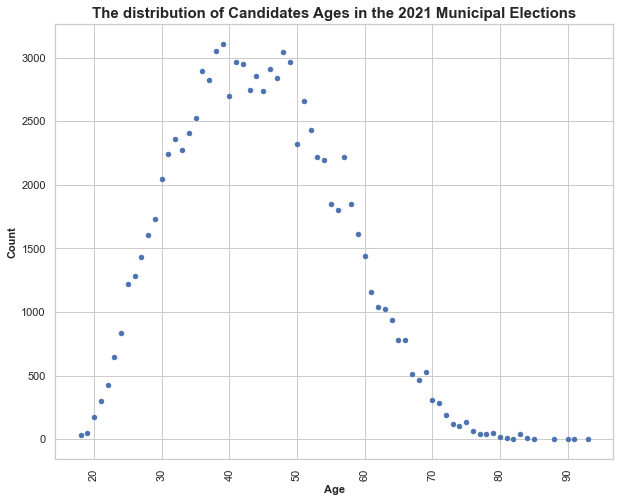

In [96]:
grouped_gender= df.groupby(['Age']).count()
grouped_gender.reset_index(inplace = True)
display(grouped_gender)

average_age = round(df['Age'].mean(), 0)
Youngest= df['Age'].min()
Oldest= df['Age'].max()
display('The average age of the candidates is: ', average_age)
display('The age of the youngest candidate is: ', Youngest)
display('The age of the oldest candidate is: ', Oldest)

#Plotting the Age countgraph
grouped_gender.plot(x='Age', y='Name', figsize=(10, 8), kind='scatter')
plt.title('The distribution of Candidates Ages in the 2021 Municipal Elections', size=15, fontweight='bold')
plt.xticks(rotation=90, size = 11 )
plt.ylabel('Count', size = 11, fontweight='bold')
plt.xlabel('Age', size = 11, fontweight='bold')


The ages of the candidates are the focus of the analysis in the above cell. We can see that the youngest candidate is 18 years old and the oldest 93 year old. The average age of the candidates is 44 years. Age in political leadership is another topic of great importance as representtion from age groups is seen as important for skill transferfrom more experienced (older)to the younger whomay be less experiences. The age distribution of this candidate list can be viewed as a healthy one that would ensure continutity.The question to be asked is whether the the election outcome was also as representative in terms of age

Party/Indep Gender  Province  \
0               ABAHLALI BASE MKHANYAKUDE MOVEMENT      F         8   
1               ABAHLALI BASE MKHANYAKUDE MOVEMENT      M        36   
2                                   ABAHLALY BAAHI      F         9   
3                                   ABAHLALY BAAHI      M         5   
4                            ABANTU BATHO CONGRESS      F       883   
..                                             ...    ...       ...   
624                            YOUNG PEOPLES PARTY      F         4   
625                            YOUNG PEOPLES PARTY      M        34   
626  YOUTH INDEPENDENCE PARTY AND YOUTH ASSOCIATES      F        19   
627  YOUTH INDEPENDENCE PARTY AND YOUTH ASSOCIATES      M        11   
628                            ZULU ROYAL PROPERTY      M         1   

     Municipality  OrderNo/Ward  Fullname  Surname  Age  Name  
0               8             8         8        8    8     8  
1              36            36        36       36   36    36  
2               9             9         9        9    9     9  
3               5             5         5        5    5     5  
4             883           883       883      883  883   883  
..            ...           ...       ...      ...  ...   ...  
624             4             4         4        4    4     4  
625            34            34        34       34   34    34  
626            19            19        19       19   19    19  
627            11            11        11       11   11    11  
628             1             1         1        1    1     1  

[629 rows x 9 columns]

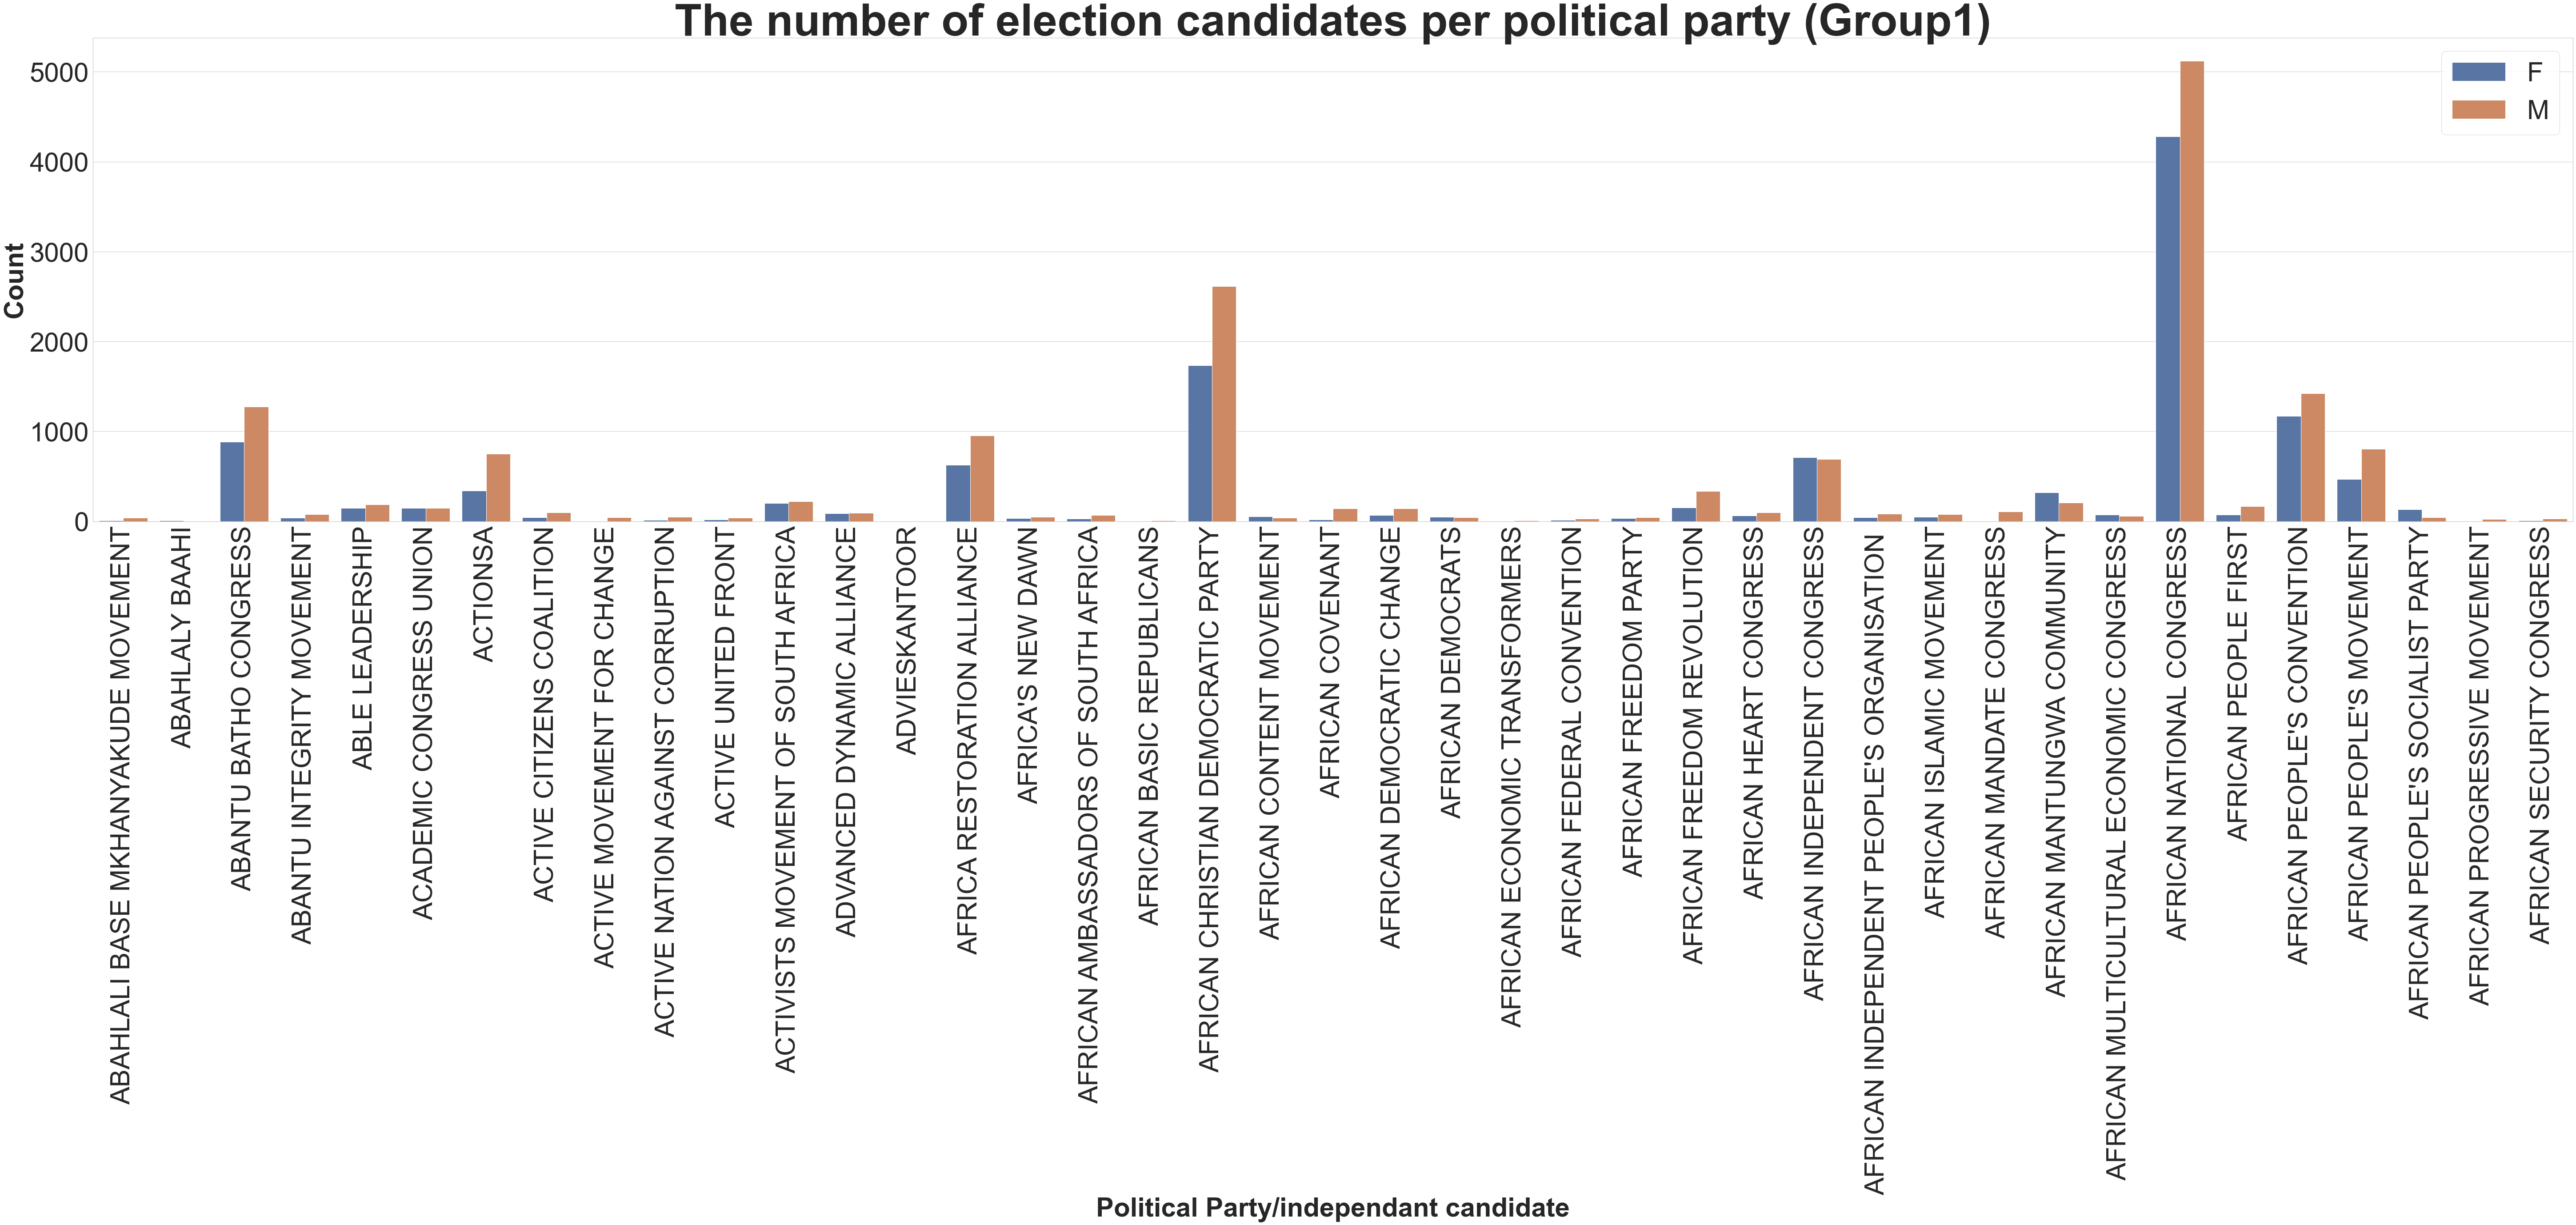

In [92]:
grouped_party= df.groupby(['Party/Indep', 'Gender']).count()
grouped_party.reset_index(inplace = True)
display(grouped_party)

#Splitting the dataframe foghsr more visible grap
grouped_party1= grouped_party.iloc[0:81]
grouped_party2= grouped_party.iloc[81:161]
grouped_party3= grouped_party.iloc[161:241]
grouped_party4= grouped_party.iloc[241:324]


#Plotting number of candidates per political party in 'grouped_party1'

plt.figure(figsize=(100, 20))
sns.barplot(x ='Party/Indep', y ='Name', data= grouped_party1, hue ='Gender')
sns.set_theme(style='whitegrid')
plt.title('The number of election candidates per political party (Group1)', size=100, fontweight='bold')
plt.xticks(rotation=90, size = 60)
plt.yticks(size = 60)
plt.ylabel('Count', size = 60, fontweight='bold')
plt.xlabel('Political Party/independant candidate', size = 60, fontweight='bold')
plt.legend(fontsize=60)

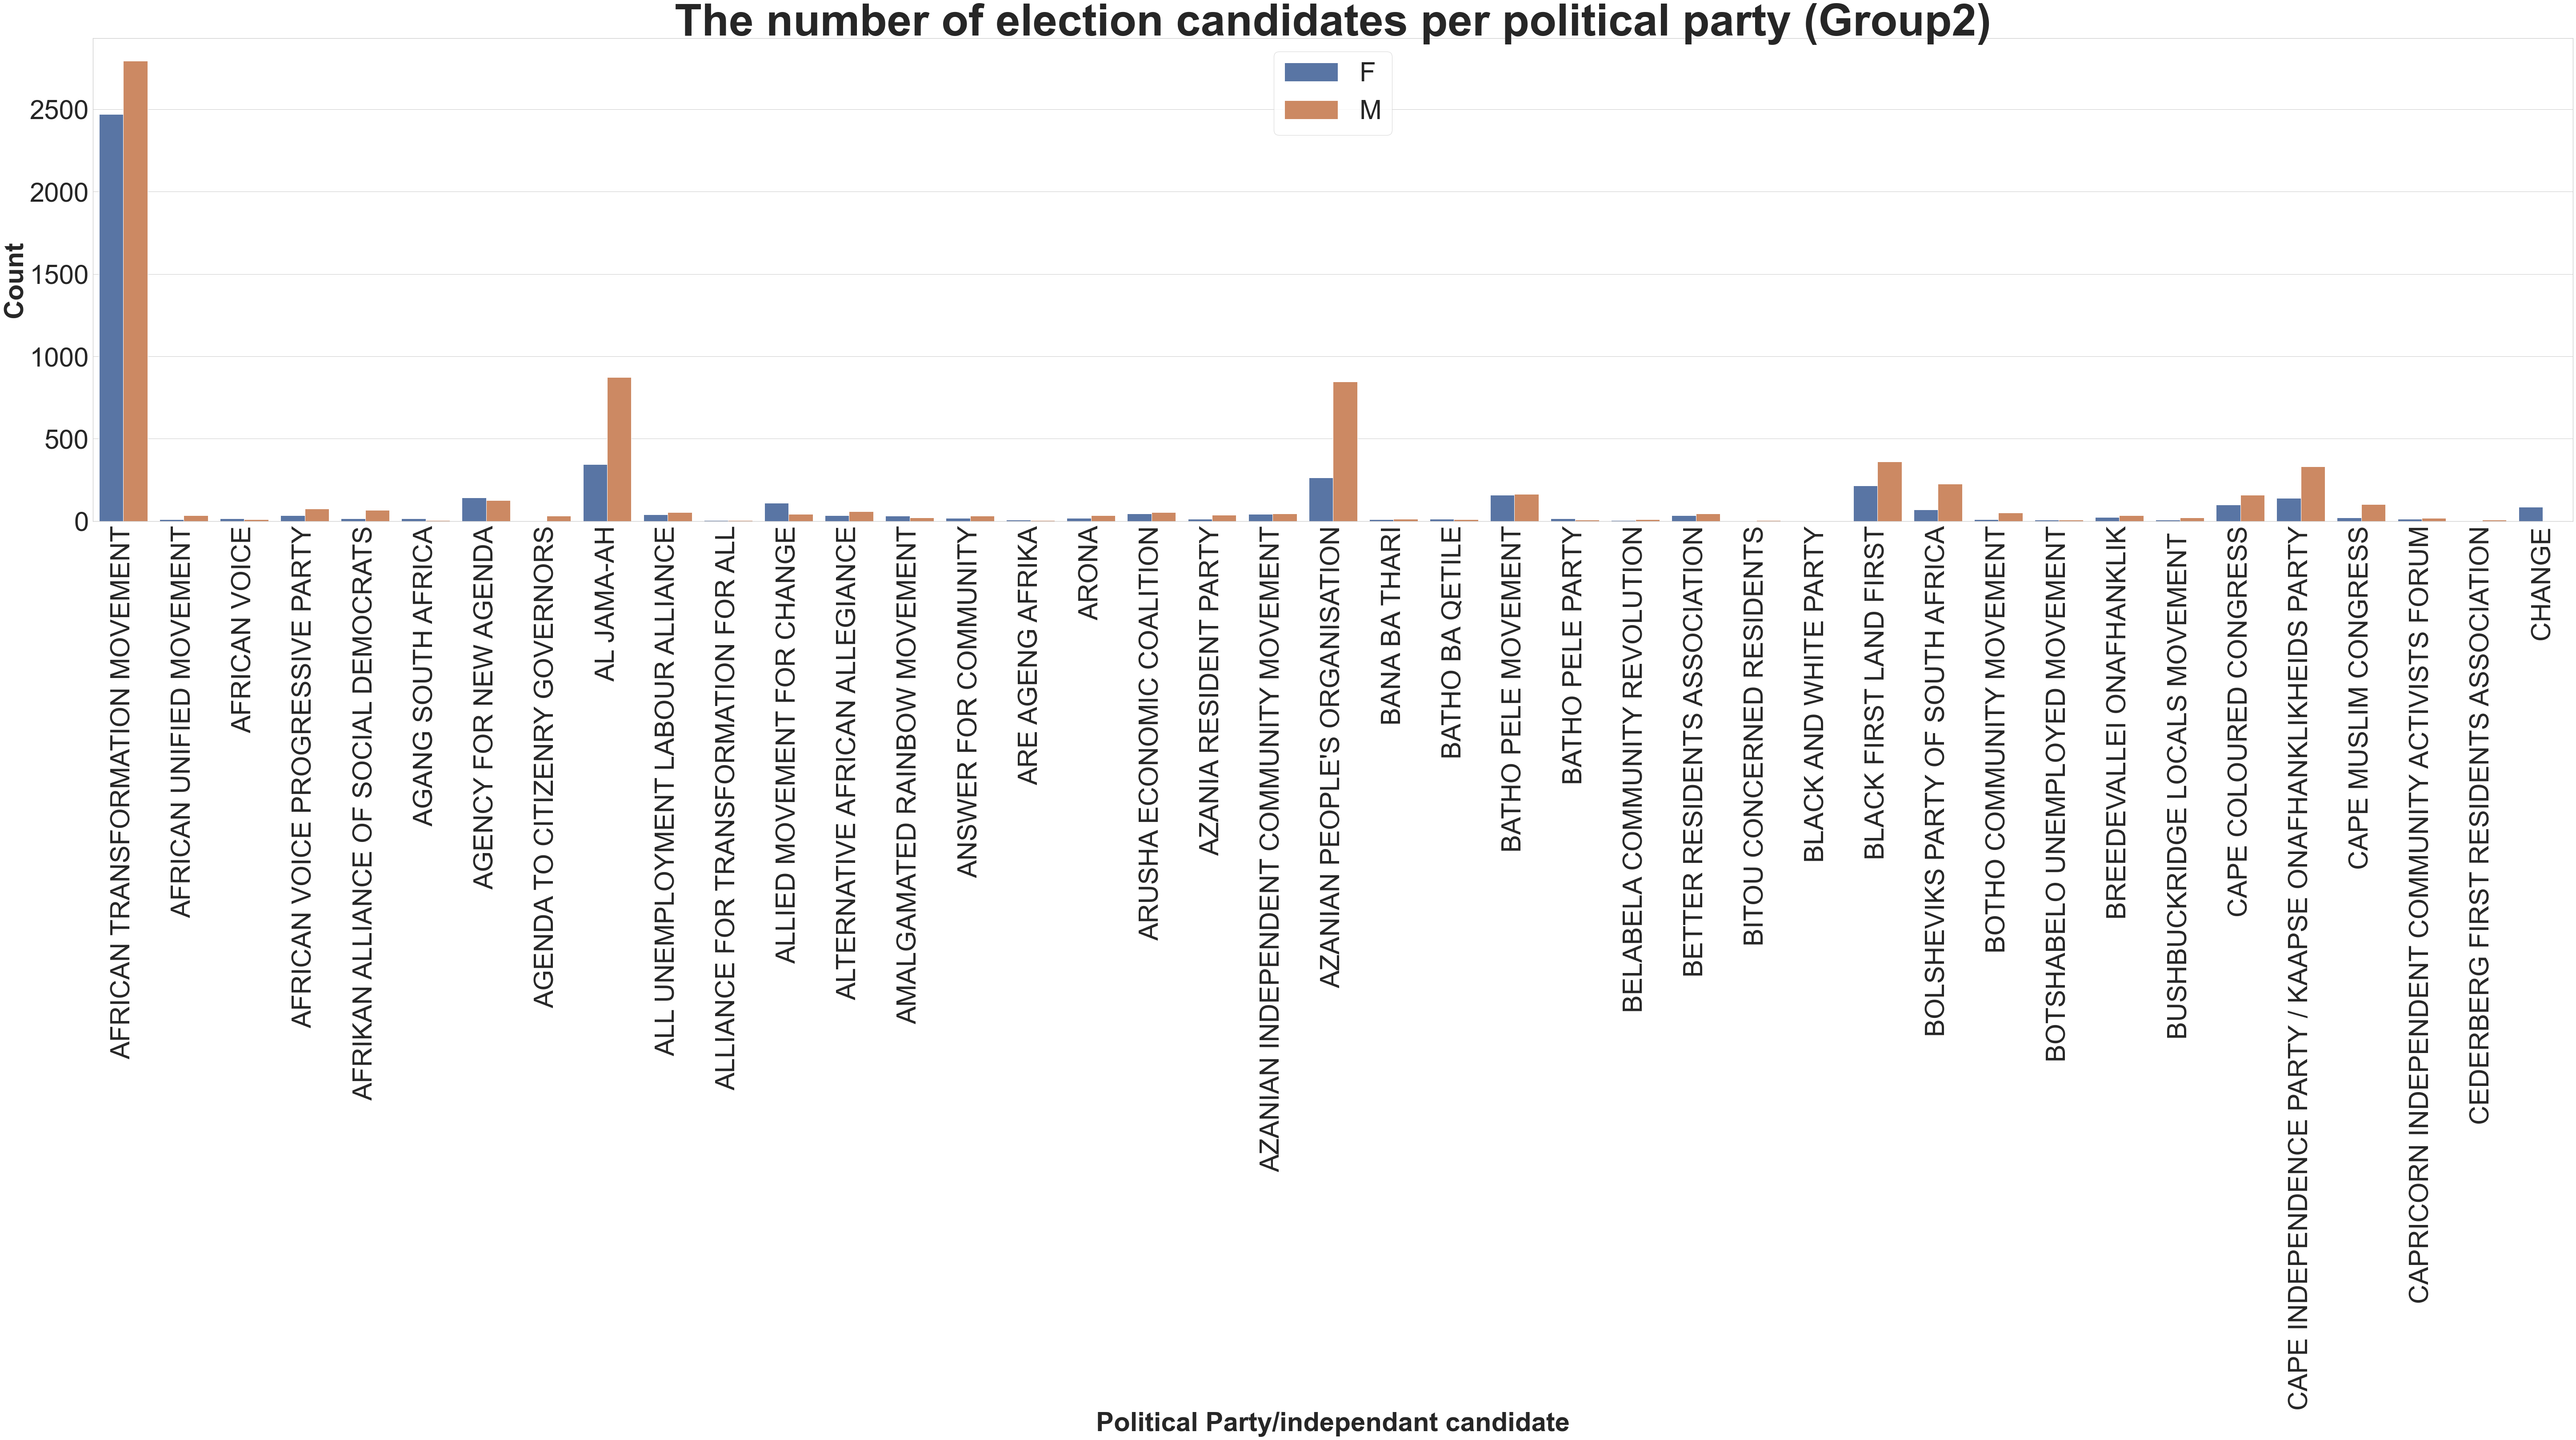

In [91]:
#Plotting number of candidates per political party in 'grouped_party2'
plt.figure(figsize=(100, 20))
sns.barplot(x ='Party/Indep', y ='Name', data= grouped_party2, hue ='Gender')
sns.set_theme(style='whitegrid')
plt.title('The number of election candidates per political party (Group2)', size=100, fontweight='bold')
plt.xticks(rotation=90, size = 60)
plt.yticks(size = 60)
plt.ylabel('Count', size = 60, fontweight='bold')
plt.xlabel('Political Party/independant candidate', size = 60, fontweight='bold')
plt.legend(fontsize=60)

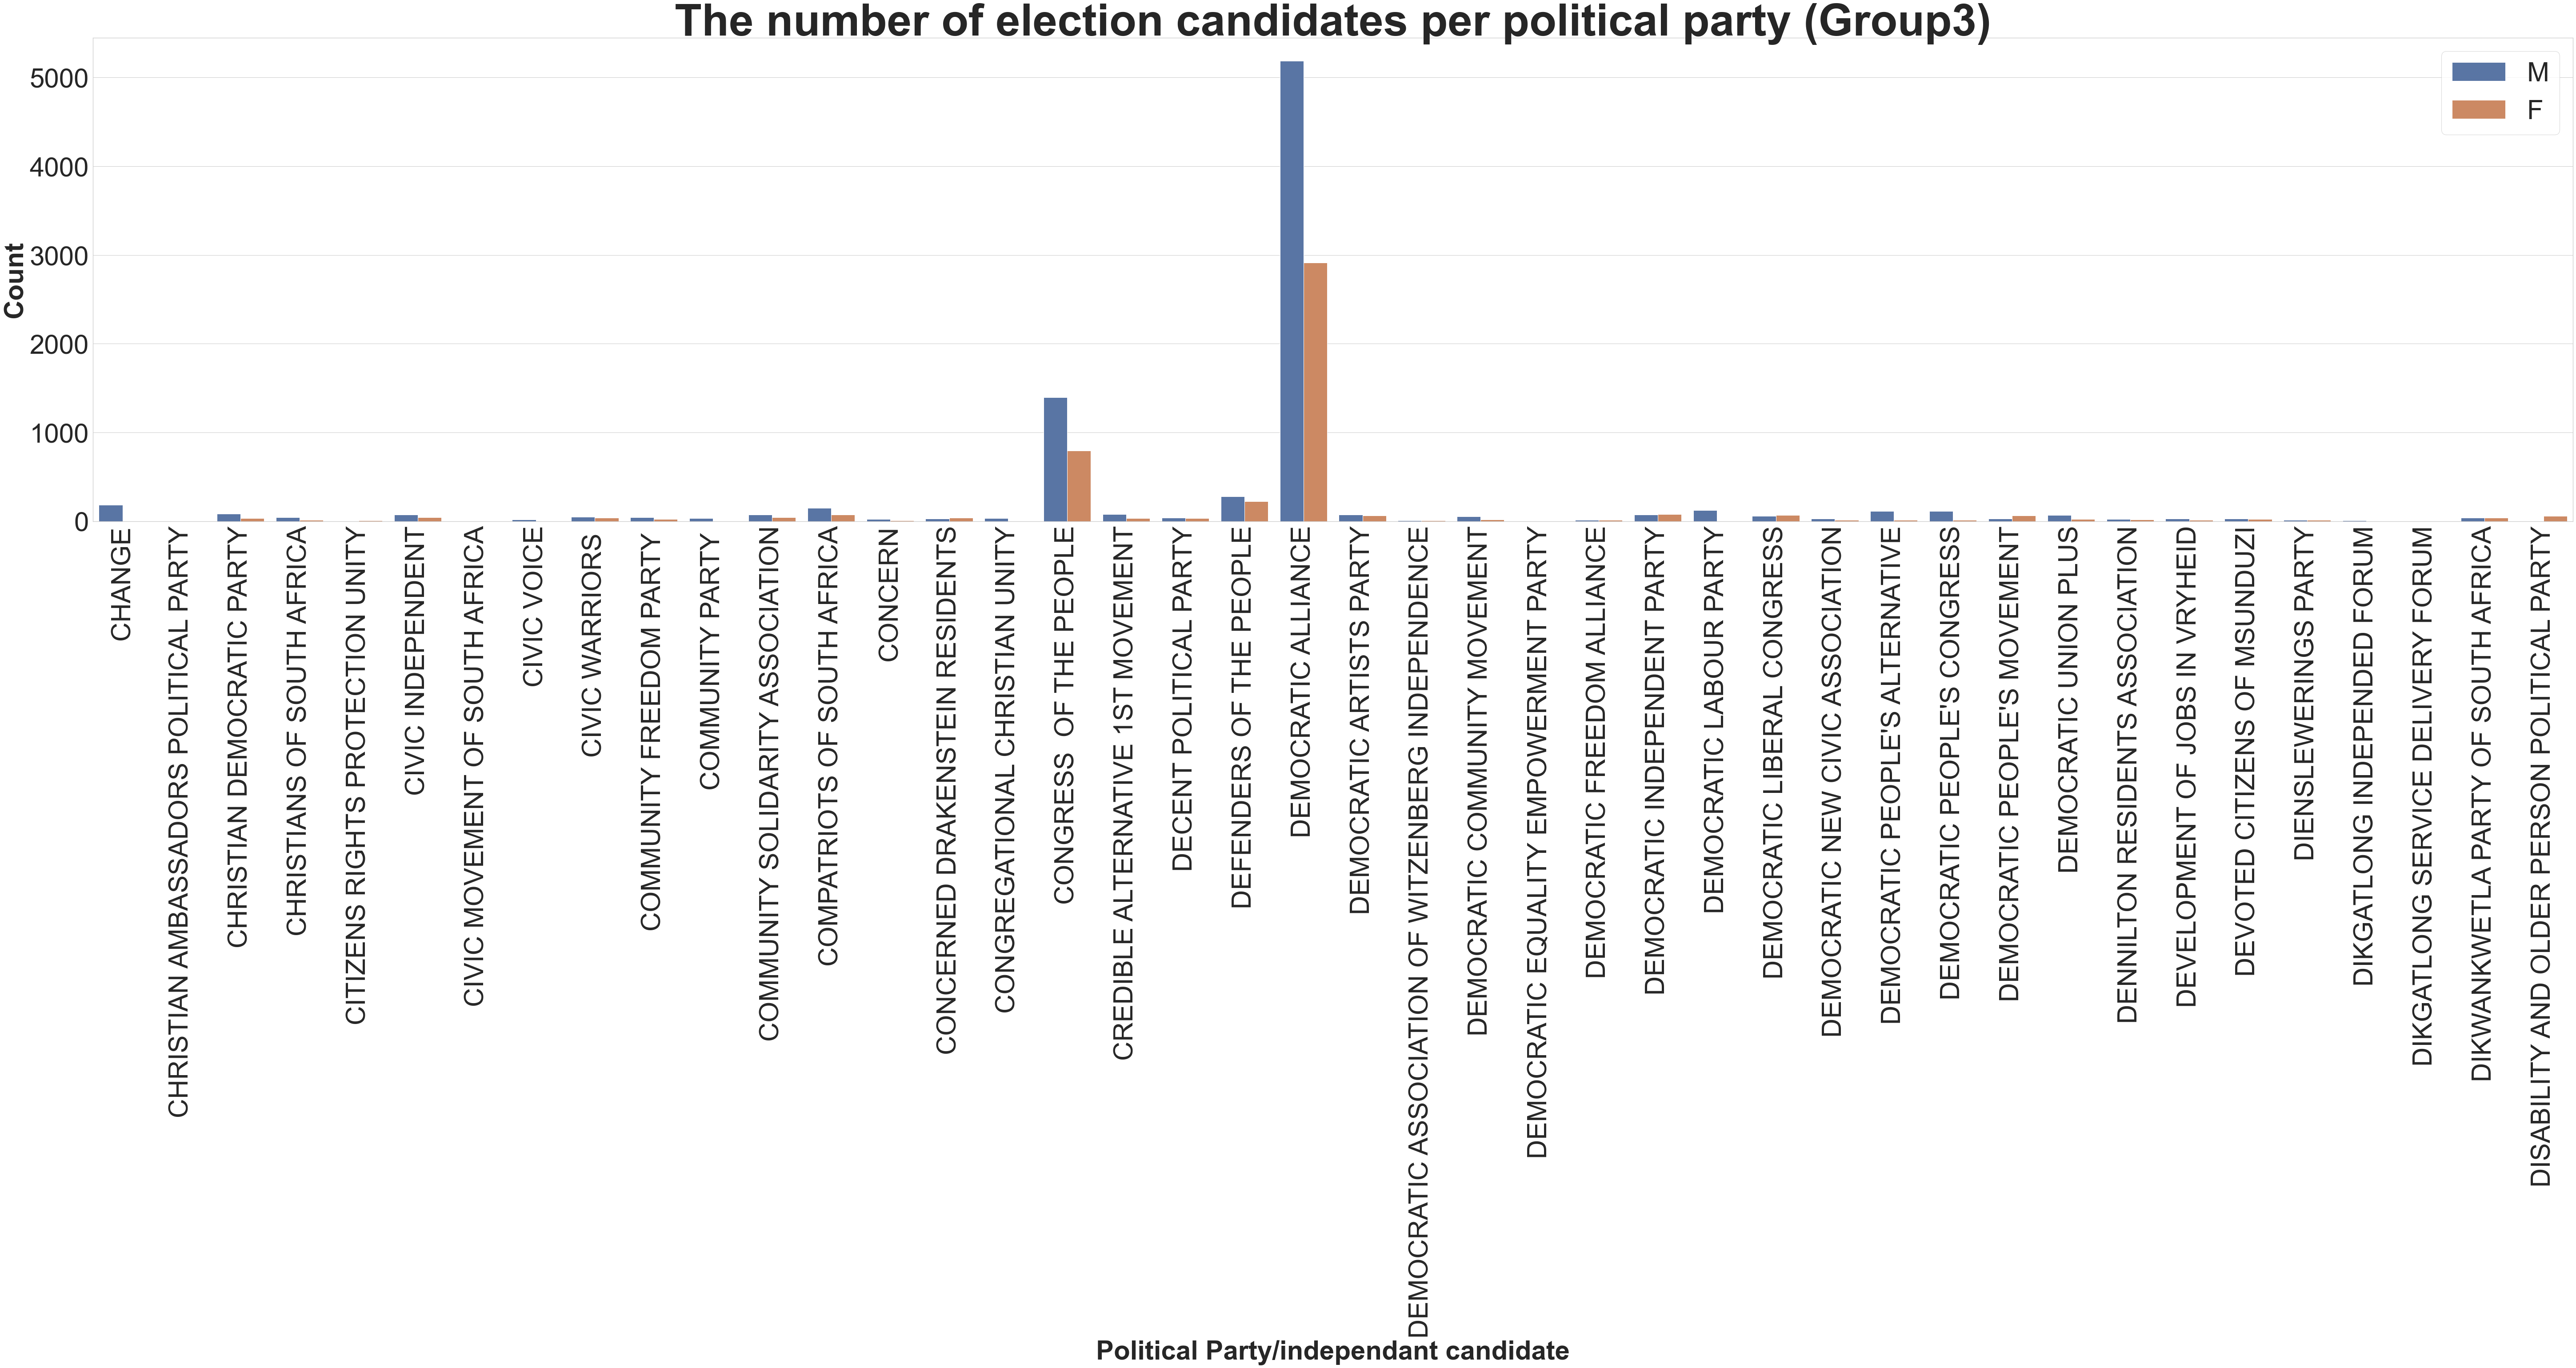

In [90]:
#Plotting number of candidates per political party in 'grouped_party3'
plt.figure(figsize=(100, 20))
sns.barplot(x ='Party/Indep', y ='Name', data= grouped_party3, hue ='Gender')
sns.set_theme(style='whitegrid')
plt.title('The number of election candidates per political party (Group3)', size=100, fontweight='bold')
plt.xticks(rotation=90, size = 60)
plt.yticks(size = 60)
plt.ylabel('Count', size = 60, fontweight='bold')
plt.xlabel('Political Party/independant candidate', size = 60, fontweight='bold')
plt.legend(fontsize=60)

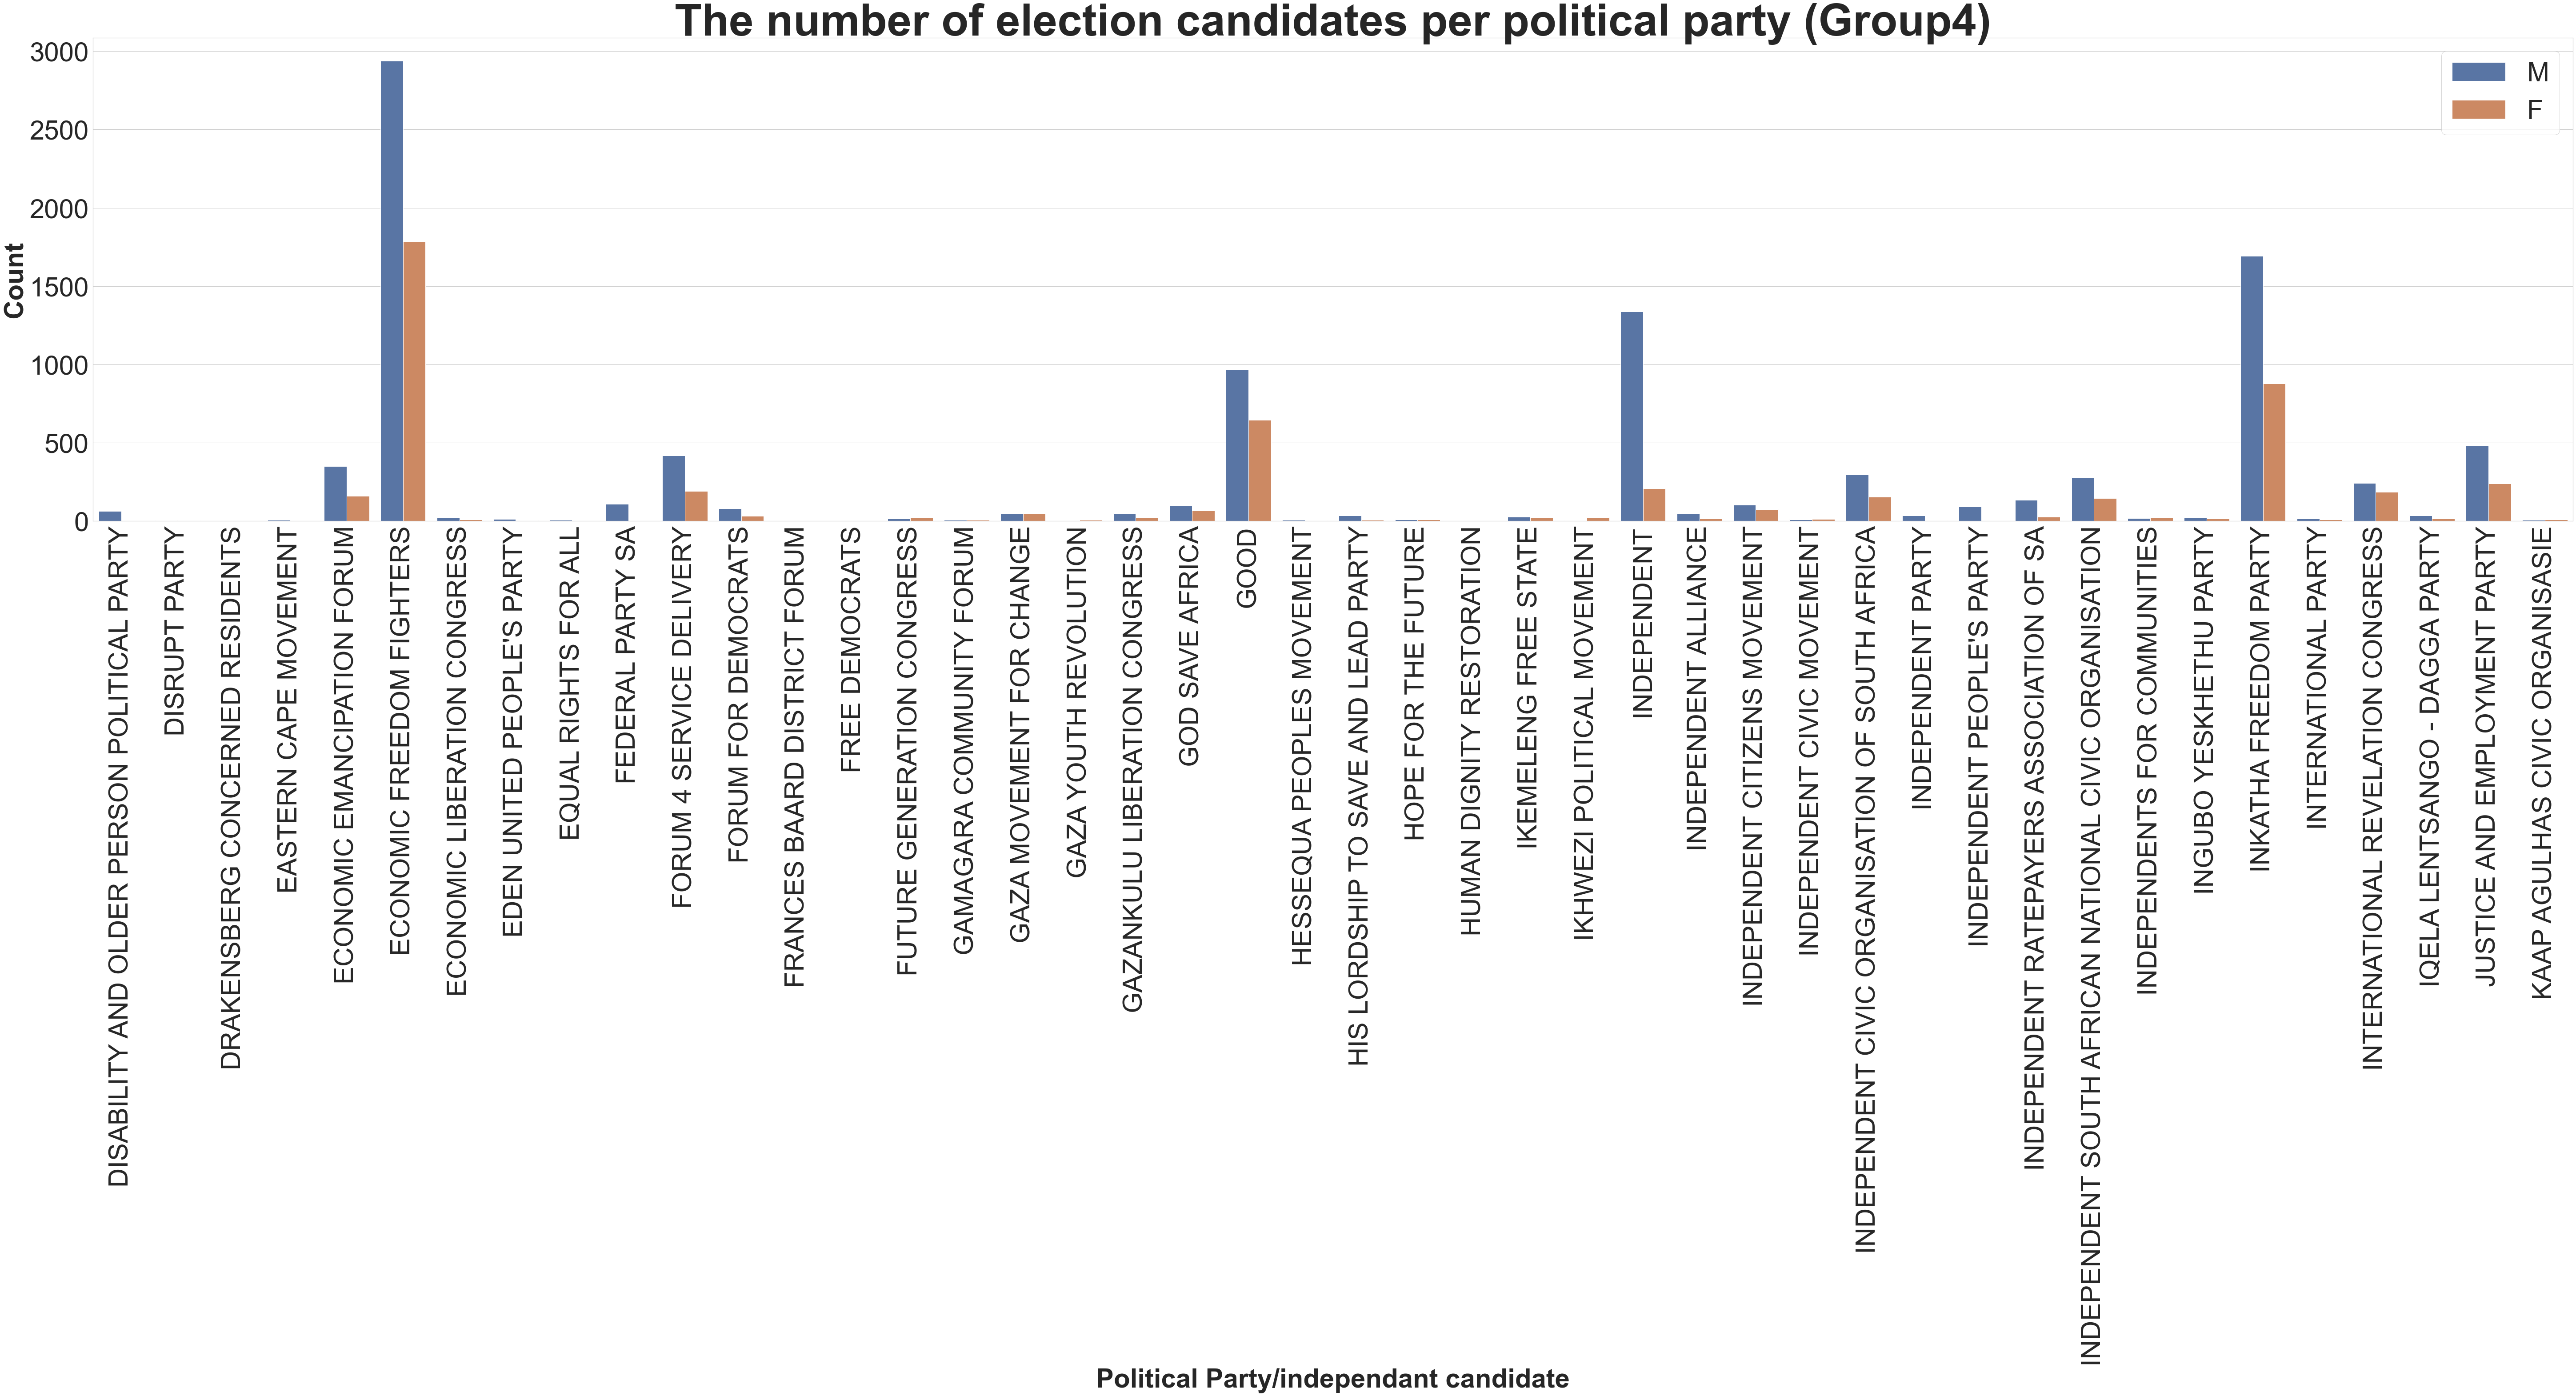

In [89]:
#Plotting number of candidates per political party in 'grouped_party4'
plt.figure(figsize=(100, 20))
sns.barplot(x ='Party/Indep', y ='Name', data= grouped_party4, hue ='Gender')
sns.set_theme(style='whitegrid')
plt.title('The number of election candidates per political party (Group4)', size=100, fontweight='bold')
plt.xticks(rotation=90, size = 60)
plt.yticks(size = 60)
plt.ylabel('Count', size = 60, fontweight='bold')
plt.xlabel('Political Party/independant candidate', size = 60, fontweight='bold')
plt.legend(fontsize=60)

In [35]:
#Determining top 10 parties with most candidates
top10= grouped_party['Name'].nlargest(n=10)

#Creating a list from the indeces of the top10 
index_list = top10.index.tolist()

#Displaying the rows of the indeces
parties_top10 = grouped_party.loc[grouped_party.index[index_list]]
display(parties_top10)

Party/Indep  Province  Municipality  OrderNo/Ward  \
34            AFRICAN NATIONAL CONGRESS      9399          9399          9399   
101                 DEMOCRATIC ALLIANCE      8102          8102          8102   
41      AFRICAN TRANSFORMATION MOVEMENT      5263          5263          5263   
127           ECONOMIC FREEDOM FIGHTERS      4722          4722          4722   
18   AFRICAN CHRISTIAN DEMOCRATIC PARTY      4344          4344          4344   
315                  VRYHEIDSFRONT PLUS      4261          4261          4261   
36          AFRICAN PEOPLE'S CONVENTION      2592          2592          2592   
160               INKATHA FREEDOM PARTY      2569          2569          2569   
306          UNITED DEMOCRATIC MOVEMENT      2509          2509          2509   
235                  PATRIOTIC ALLIANCE      2264          2264          2264   

     Fullname  Surname  Gender   Age  Name  
34       9399     9399    9399  9399  9399  
101      8102     8102    8102  8102  8102  
41       5263     5263    5263  5263  5263  
127      4722     4722    4722  4722  4722  
18       4344     4344    4344  4344  4344  
315      4261     4261    4261  4261  4261  
36       2592     2592    2592  2592  2592  
160      2569     2569    2569  2569  2569  
306      2509     2509    2509  2509  2509  
235      2264     2264    2264  2264  2264

In [93]:
#Determining bottom 10 parties with least candidates
bottom10= grouped_party['Name'].nsmallest(n=10)

#Creating a list from the indeces of the top10 
index_list = bottom10.index.tolist()

#Displaying the rows of the indeces
parties_bottom10 = grouped_party.loc[grouped_party.index[index_list]]
display(parties_bottom10)

Party/Indep Gender  Province  Municipality  \
26                           ADVIESKANTOOR      F         1             1   
95           AGENDA TO CITIZENRY GOVERNORS      F         1             1   
135              BITOU CONCERNED RESIDENTS      F         1             1   
162  CHRISTIAN AMBASSADORS POLITICAL PARTY      F         1             1   
236      DIKGATLONG SERVICE DELIVERY FORUM      F         1             1   
244        DRAKENSBERG CONCERNED RESIDENTS      M         1             1   
245                  EASTERN CAPE MOVEMENT      F         1             1   
264                         FREE DEMOCRATS      M         1             1   
285              HUMAN DIGNITY RESTORATION      M         1             1   
302             INDEPENDENT PEOPLE'S PARTY      F         1             1   

     OrderNo/Ward  Fullname  Surname  Age  Name  
26              1         1        1    1     1  
95              1         1        1    1     1  
135             1         1        1    1     1  
162             1         1        1    1     1  
236             1         1        1    1     1  
244             1         1        1    1     1  
245             1         1        1    1     1  
264             1         1        1    1     1  
285             1         1        1    1     1  
302             1         1        1    1     1